# LES Band Azimuthal Angle Model Training
---
Central Lake Ontario Buoy Environmental Database

### Carter J. Humphreys
Email: [chumphre@oswego.edu](mailto:chumphre@oswego.edu) | GitHub:[@HumphreysCarter](https://github.com/HumphreysCarter) | Website: [carterhumphreys.com](http://carterhumphreys.com/)

In [57]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pickle
import joblib 
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error, r2_score 

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

## Load The Data

In [58]:
# Load dataset
dataPath="../data/LO1_dataset.csv"
dataset=pd.read_csv(dataPath)

In [59]:
# Drop unused data
dataset=dataset.drop(['DateTime [UTC]', 'BandStart_Latitude', 'BandStart_Longitude', 'BandMidpoint_Latitude', 'BandMidpoint_Longitude', 'BandEnd_Latitude', 'BandEnd_Longitude', 'BandIntensity [dBZ]', 'BandRng_LO1 [km]'], axis=1)

## Dataset Summary

In [60]:
# shape
print(dataset.shape)

(1145, 31)


In [61]:
# head
print(dataset.head(5))

   BandAz_LO1 [deg]  WaterTemp_Ontario [degC]  IceCover_Ontario [%]  \
0         95.175078                     13.26                   0.0   
1         95.400996                     13.26                   0.0   
2         96.200389                     13.26                   0.0   
3         96.285512                     13.26                   0.0   
4         93.124002                     13.26                   0.0   

   IceCover_Huron [%]  IceCover_Erie [%]  z_925mb [m]  T_925mb [degC]  \
0                 0.0                0.0       803.81           -2.83   
1                 0.0                0.0       804.51           -1.72   
2                 0.0                0.0       810.72           -1.56   
3                 0.0                0.0       816.24           -1.11   
4                 0.0                0.0       817.79           -1.43   

   dT/dz_water-925hPa [degC/km]  RH_925mb [%]  u_925mb [kt]  ...  \
0                     20.017168         74.37          6.59  ...  

In [62]:
# descriptions
print(dataset.describe())

       BandAz_LO1 [deg]  WaterTemp_Ontario [degC]  IceCover_Ontario [%]  \
count       1145.000000               1145.000000           1145.000000   
mean          93.641756                  4.608821              4.733284   
std           22.816799                  2.408046              6.983989   
min           48.341748                  1.350000              0.000000   
25%           78.997491                  2.820000              0.070000   
50%           89.729152                  3.970000              0.930000   
75%          105.391728                  6.140000              8.160000   
max          190.940376                 13.260000             24.930000   

       IceCover_Huron [%]  IceCover_Erie [%]  z_925mb [m]  T_925mb [degC]  \
count         1145.000000        1145.000000  1145.000000     1145.000000   
mean            19.422943          23.082725   732.873624       -9.868769   
std             23.370011          32.730655    58.765264        5.070765   
min             

In [63]:
# class distribution
print(dataset.groupby(['BandAz_LO1 [deg]']).size())

BandAz_LO1 [deg]
48.341748     1
48.911912     1
49.496370     1
53.483705     1
53.739637     1
             ..
185.139644    1
185.790321    1
186.779774    1
187.719530    1
190.940376    1
Length: 1102, dtype: int64


## Data Visualization

In [64]:
# box and whisker plots
#dataset.plot(figsize=(20, 20), kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False)
#pyplot.show()

In [65]:
# histograms
#dataset.hist(figsize=(20,20), layout=(6,6))
#pyplot.show()

In [66]:
# scatter plot matrix
#scatter_matrix(dataset, figsize=(20,20))
#pyplot.show()

## Algorithms

In [67]:
# Split-out validation dataset
array = dataset.values
X = array[:,1:31]
y = array[:,0:1]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.30, random_state=1)
print(y)
print(X)

[[ 95.17507781]
 [ 95.40099588]
 [ 96.20038855]
 ...
 [ 93.86628409]
 [120.28063776]
 [113.06976448]]
[[ 13.26   0.     0.   ...  37.65 -12.4   26.86]
 [ 13.26   0.     0.   ...  36.14 -13.87  30.15]
 [ 13.26   0.     0.   ...  34.44 -13.16  28.75]
 ...
 [  2.23   4.63  19.43 ...  30.79   9.28  22.16]
 [  2.23   4.63  19.43 ...  32.32   5.9   25.14]
 [  2.23   4.63  19.43 ...  33.84   1.33  32.51]]


In [68]:
# Spot Check Algorithms
models = []
models.append(('MultiLR', LinearRegression()))
models.append(('KNN(n=2)', KNeighborsRegressor(n_neighbors=2)))
models.append(('KNN(n=5)', KNeighborsRegressor(n_neighbors=5)))
#models.append(('DecisionTree', DecisionTreeRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
#models.append(('MLPR', MLPRegressor()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold)
    if name != 'MultiLR': # Hide MultiLR since data is skewed 
        results.append(cv_results)
        names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

MultiLR: 0.376226 (0.031647)
KNN(n=2): 0.705823 (0.041198)
KNN(n=5): 0.598997 (0.064635)


/home/CarterHumphreys/.virtualenvs/research/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/CarterHumphreys/.virtualenvs/research/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/CarterHumphreys/.virtualenvs/research/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/CarterHumphreys/.virtualenvs/research

RandomForest: 0.610591 (0.047962)


/home/CarterHumphreys/.virtualenvs/research/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


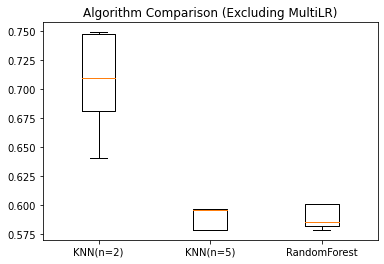

In [69]:
# Compare Algorithms
pyplot.boxplot(results, labels=names, showfliers=False)
pyplot.title('Algorithm Comparison (Excluding MultiLR)')
pyplot.show()

## Predictions and Validation

==================== MultiLR ====================


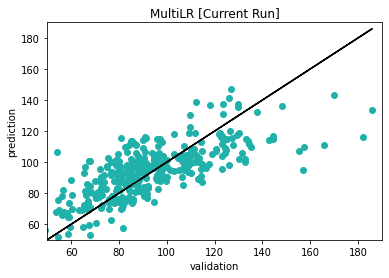

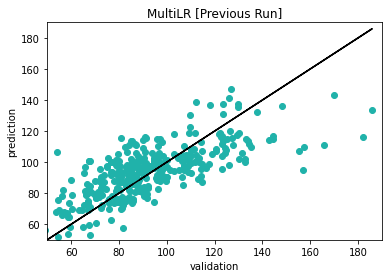

Metric			Curr Score		Prev Score
----------		---------		--------
max_error		66.09010004283604	66.09010004283604
mean_absolute_error	12.075365893510517	12.075365893510517
mean_squared_error	245.8895148826854	245.8895148826854
r2_score		0.5184684078230859	0.5184684078230859


==================== KNN(n=2) ====================


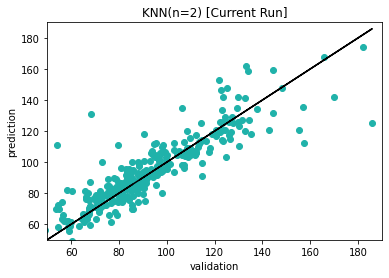

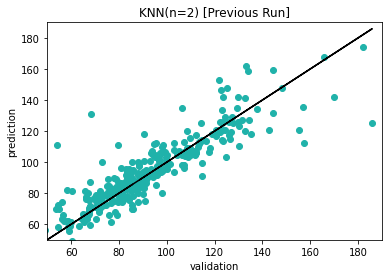

Metric			Curr Score		Prev Score
----------		---------		--------
max_error		63.010268550106645	63.010268550106645
mean_absolute_error	6.7921002745767565	6.7921002745767565
mean_squared_error	116.298158509707	116.298158509707
r2_score		0.7722504049790789	0.7722504049790789


==================== KNN(n=5) ====================


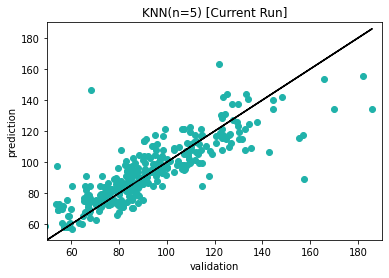

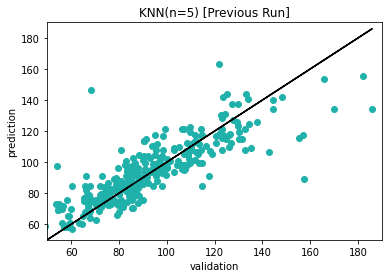

Metric			Curr Score		Prev Score
----------		---------		--------
max_error		78.0010279333498	78.0010279333498
mean_absolute_error	8.162952993306778	8.162952993306778
mean_squared_error	150.4147300014406	150.4147300014406
r2_score		0.7054390690102803	0.7054390690102803


==================== RandomForest ====================


/home/CarterHumphreys/.virtualenvs/research/lib/python3.7/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


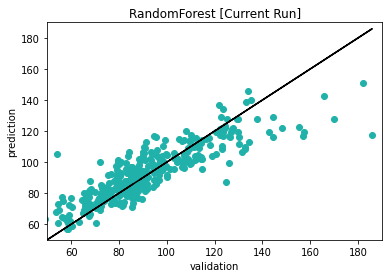

/home/CarterHumphreys/.virtualenvs/research/lib/python3.7/site-packages/ipykernel/__main__.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


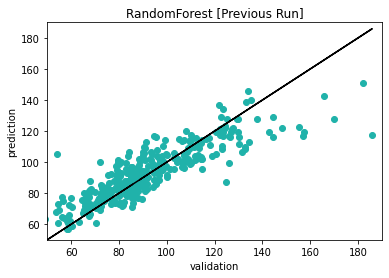

Metric			Curr Score		Prev Score
----------		---------		--------
max_error		68.11530200894188	72.33449105441179
mean_absolute_error	8.345268859868396	8.680592283985186
mean_squared_error	136.45742293308572	153.53366165934452
r2_score		0.7327720128258537	0.6993311870705481
Saving model...




In [70]:
for name, model in models:
    print(f'==================== {name} ====================') 
    
    # Make predictions on validation dataset
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    
    # Evaluate current model
    currMaxError=max_error(Y_validation, predictions)
    currAbsError=mean_absolute_error(Y_validation, predictions)
    currMeanSqrError=mean_squared_error(Y_validation, predictions)
    currR2score=r2_score(Y_validation, predictions)
    
    pyplot.plot(Y_validation, Y_validation, color='black')
    pyplot.scatter(Y_validation, predictions, marker='o', color='lightseagreen');
    pyplot.title(f'{name} [Current Run]')
    pyplot.xlabel("validation")
    pyplot.ylabel("prediction")
    pyplot.xlim(50, 190)
    pyplot.ylim(50, 190)
    pyplot.show()    
    
    # Load previous model and make predictions on validation dataset
    previousModel=joblib.load(f'../models/LES_Band_Position_Model_{name}_LO1_Az')  
    previousModel.fit(X_train, Y_train)
    prevPredictions=previousModel.predict(X_validation)
    
    # Evaluate previous model
    prevMaxError=max_error(Y_validation, prevPredictions)
    prevAbsError=mean_absolute_error(Y_validation, prevPredictions)
    prevMeanSqrError=mean_squared_error(Y_validation, prevPredictions)
    prevR2score=r2_score(Y_validation, prevPredictions)

    pyplot.plot(Y_validation, Y_validation, color='black')
    pyplot.scatter(Y_validation, predictions, marker='o', color='lightseagreen');
    pyplot.title(f'{name} [Previous Run]')
    pyplot.xlabel("validation")
    pyplot.ylabel("prediction")
    pyplot.xlim(50, 190)
    pyplot.ylim(50, 190)
    pyplot.show()
    
    print('Metric\t\t\tCurr Score\t\tPrev Score')
    print('----------\t\t---------\t\t--------')
    print(f'max_error\t\t{currMaxError}\t{prevMaxError}')
    print(f'mean_absolute_error\t{currAbsError}\t{prevAbsError}')
    print(f'mean_squared_error\t{currMeanSqrError}\t{prevMeanSqrError}')
    print(f'r2_score\t\t{currR2score}\t{prevR2score}')

    # Save model if r^2 better
    if currR2score > prevR2score:
        print('Saving model...')
        joblib.dump(model, f'../models/LES_Band_Position_Model_{name}_LO1_Az') 
    print('\n')